# ENGR-E 221 Homework 7: Dimensional Reduction

## Due: Monday 10/16/2023 at 23:59 EST

## Homework Details 

**Your name must be included wihin the filename you submit and in the notebook**

Make sure all the source code is in your root HW7 directory, and not in some weird sub-directory. Make sure you can run the code (from within Jupyter or from within an interactive Python shell). ALL your code must by included either as .py files that are submitted as a zip or as a complete notebook. 

## 1. Classification Performance with IRIS (10 points)

Load the IRIS data into your progrmaming environment. 

Write a function named classification_check that takes a data set and labels as arguments. 

Procedure:

1. Choose a classifier C of your choice
2. Divide data in training and test sets.
3. Fit you data using C and make predictions on test data.
4. Create a scatter plot with test data using actual labels for color
5. Create a scatter plot with test data according to class labels assigned by your classifier 
6. Print Confusion Matrix for this fit.

(150, 4) (150,)


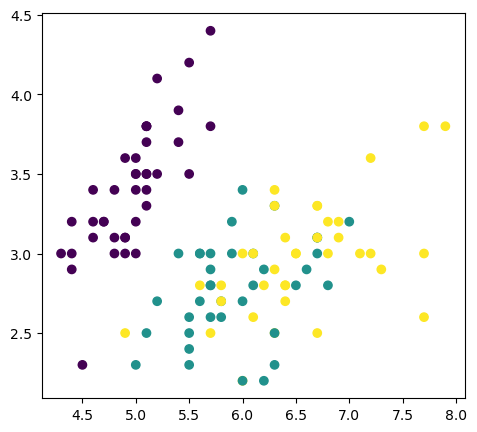

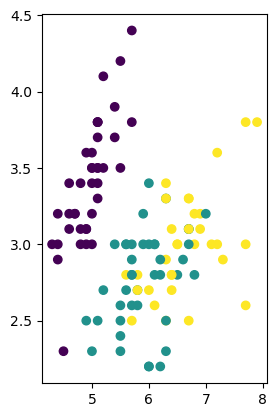

[[39  0  0]
 [ 0 36  1]
 [ 0  5 31]]


In [2]:
# 1  
import numpy as np 
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

def classification_check (X,Y, i):
    C = SVC()
    C.fit(X, Y)
    y_pred = C.predict(X)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, i], c=Y)
    plt.show()
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X[:, i], c=y_pred)
    plt.show()
    confusion_matrix = metrics.confusion_matrix(Y, y_pred)
    print(confusion_matrix)
    plt.show()
    
iris = datasets.load_iris()

# from homework 5

X = iris.data[:, :4] # 4 features
y = iris.target # lables
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y)

classification_check(X_train,y_train,1)

## Question 2: Reduce number of features using PCA (20 points) 

1. Import PCA from sklearn and use it to fit your data to 3,2 and 1 dimensions. Print the variance ratio for each fit and choose the best options. (5 pts)
2. Discuss your choice of how many dimensions you should keep. (3 pts) 
3. Transform your data to lower dimension. (2 pts) 
4. Send this data to function you wrote in question 2. (5 pts)
5. Identify and discuss difference from original data. (5 pts) 

3-D:
[0.92533614 0.05277742 0.01719191]


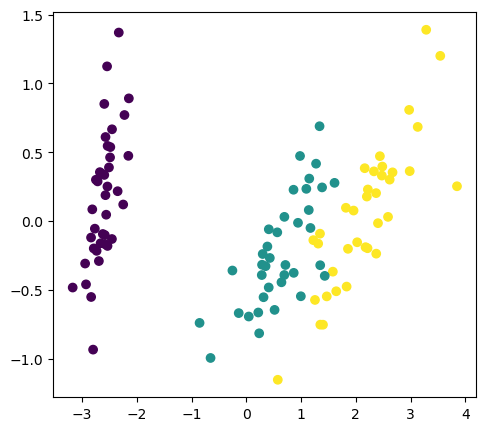

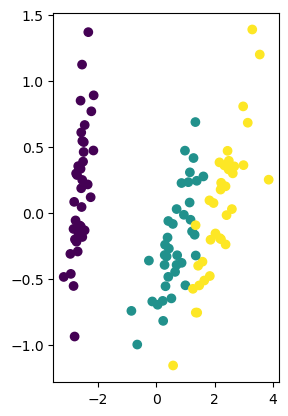

[[39  0  0]
 [ 0 36  1]
 [ 0  2 34]]
2-D:
[0.92533614 0.05277742]


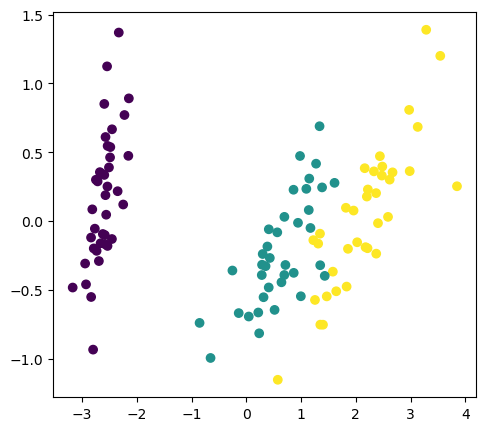

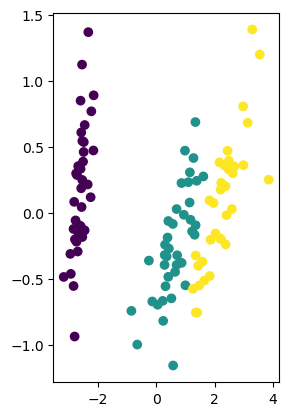

[[39  0  0]
 [ 0 35  2]
 [ 0  4 32]]
1-D:
[0.92533614]


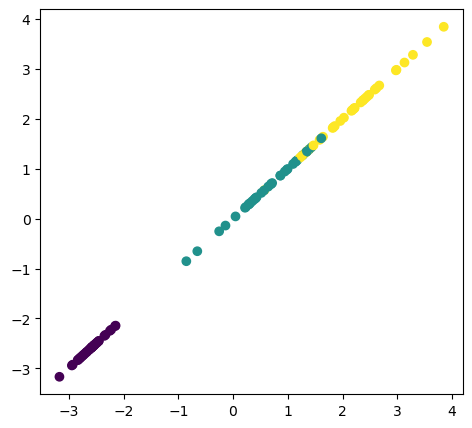

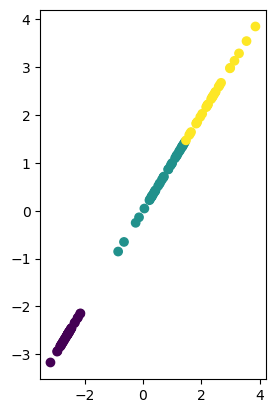

[[39  0  0]
 [ 0 36  1]
 [ 0  7 29]]


In [3]:
# 2
from sklearn.decomposition import PCA
print("3-D:")
pca = PCA(n_components=3, whiten = False, random_state = 0)
pca.fit(X_train)
print (pca.explained_variance_ratio_)
X_pca=pca.transform(X_train)

classification_check(X_pca,y_train,1)
print("2-D:")
pca1 = PCA(n_components=2, whiten = False, random_state = 0)
pca1.fit(X_train)
print (pca1.explained_variance_ratio_)
X_pca1=pca1.transform(X_train)

classification_check(X_pca1,y_train,1)
print("1-D:")
pca2 = PCA(n_components=1, whiten = False, random_state = 0)
pca2.fit(X_train)
print (pca2.explained_variance_ratio_)
X_pca2=pca2.transform(X_train)

classification_check(X_pca2,y_train, 0)

### Question 2 part 2 and part 5

part 2:
According to the variance ratio of the 3 dimensions the second and third dimensions have a variance ratio less than 10% revealing that the last 2 labels(or dimensions) are less relevant to the data. This is furthur authenticated by the variance ratio of the 2 dimensions as the socres are the same as the 3 dimensions except without the last label. This leads us to believe that the best number of dimensions needed for the data is 1 dimension with a variance score of 0.925 or 92% label importance.

part 5:
Reducing the data to 3 dimensions using PCA the graph the data points are further apart than the originial data points with nearly no overlapping points opposed to the original where green and yellow have multiple overlapping points. Reducing it further down to 2 dimesnions the data is even further apart and has no overlapping points. Reducing it even further to 1 dimension we get a straight line with many overlapping points between green and yellow. This showcases that the best graph is possibly graph 2-D which will have a total variance ratio of approximately 0.98 or 98% label importance and no overlapping data points.

## Question 3: Reduce the number of features using TSNE (20 points) 

1. Import TSNE from sklearn and use it to fit your data to 3,2 and 1 dimensions. Print kl_divergence for each fit and choose the best option. (5 pts)
2. Discuss your choice of how many dimensions you should keep. (3 pts) 
3. Transform your data to lower dimension. (2 pts) 
4. Send this data to function you wrote in question 2. (5 pts) 
5. Identify and discuss differences from your PCA results. (5 pts) 

3-D:
1.4049633378487005


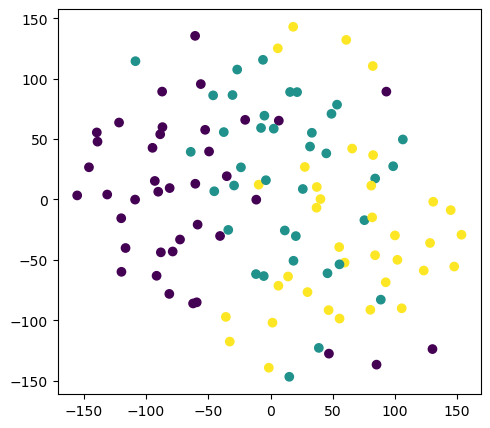

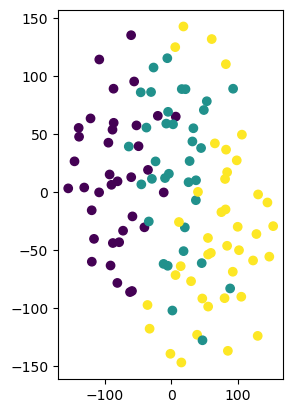

[[35  2  2]
 [ 1 28  8]
 [ 0  5 31]]
2-D:
0.0809563955128503


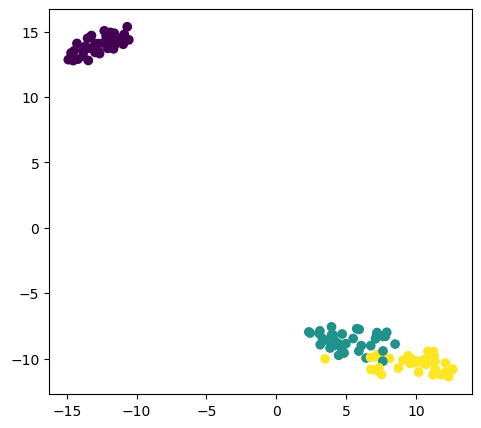

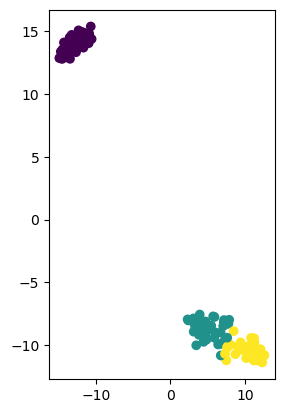

[[39  0  0]
 [ 0 35  2]
 [ 0  5 31]]
1-D:
0.32389001654037686


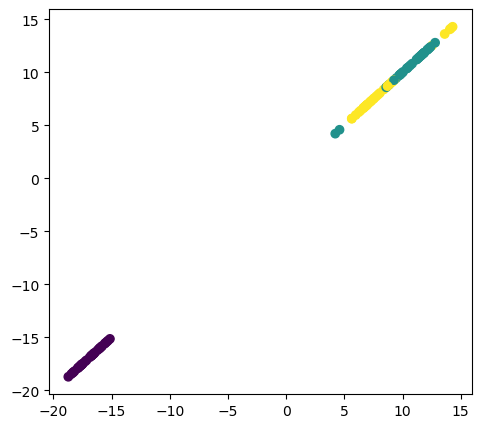

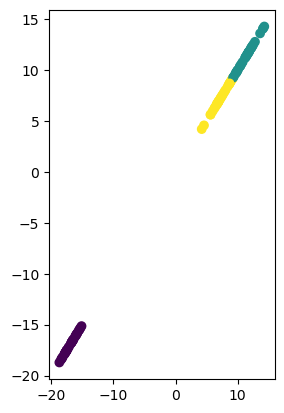

[[39  0  0]
 [ 0 33  4]
 [ 0  6 30]]


In [5]:
# 3
from sklearn.manifold import TSNE
from sklearn import metrics
print("3-D:")
tsne = TSNE(n_components=3,learning_rate=100,perplexity = 30,early_exaggeration = 12,init = 'random',  method='exact' , random_state=2019)
X_tsne = tsne.fit_transform(X_train)
print (tsne.kl_divergence_ )
classification_check(X_tsne,y_train,1)
print("2-D:")
tsne1 = TSNE(n_components=2,learning_rate=100,perplexity = 30,early_exaggeration = 12,init = 'random',  method='exact' , random_state=2019)
X_tsne1 = tsne1.fit_transform(X_train)
print (tsne1.kl_divergence_ )
classification_check(X_tsne1,y_train,1)
print("1-D:")
tsne2 = TSNE(n_components=1,learning_rate=100,perplexity = 30,early_exaggeration = 12,init = 'random',  method='exact' , random_state=2019)
X_tsne2 = tsne2.fit_transform(X_train)
print (tsne2.kl_divergence_ )
classification_check(X_tsne2,y_train,0)

### Question 3 part 2 and part 5

part 2:
Based on the KL scores calulated for the different dimensions the best dimension for the data to be reduced to is the 2 dimesnions(2-D). 2-D has the lowest Kl score of approximately 0.081 which is significantly smaller than the 1-D score of 0.32 and 3-D score of 1.4. This also proves our hypothesis made in the previous task that 2-D is the best form of dimensional reduction.
part 5:
Looking at the 3-D graph produced by t-SNE the 3-D grpah produced by PCA they look completly different. In the PCA graph the data points are spread furthur apart keeping together the general look of the original graph. On the other hand t-SNE seems to close in the data points and keeping the close datapoints together making it look significantly different than the orignial and PCA graphs. Similarly, the 2-D graphs act the same as the 3-D graph but the clustering of data points using t-SNE is more appearent on the 2-D graph than in the 3-D t-SNE graph. Additionally the PCA graph still looks similar to the orignial graph but the t-SNE graph appears to be a completely different graph. Surprisingly, the 1-D t-SNE graph is the most similar to the 1-D PCA graph. These results coupled with the KL score prove that 2-D is the best dimension to be reduced to for this data set.